In [1]:

import pandas as pd 
import seaborn as sns 
from matplotlib import pyplot as plt 
import numpy as np 
import datetime as dt
from datetime import datetime, timedelta
import matplotlib.dates as mdates

#Data Retrieving
import yfinance as yf
from bcb import sgs 

### A grasp of BTG...

In [2]:
btg = yf.Ticker("BPAC11.SA")

btg_df = pd.DataFrame.from_dict(data=btg.info)
btg_df.head(1)

,address1,address2,city,state,zip,country,phone,website,industry,industryDisp,...,returnOnEquity,grossProfits,operatingCashflow,earningsGrowth,revenueGrowth,grossMargins,ebitdaMargins,operatingMargins,financialCurrency,trailingPegRatio
0,"Av. Brigadeiro Faria Lima, 3.477",14th Floor PAtio Victor Malzoni - Itaim Bibi,São Paulo,SP,04538-133,Brazil,55 11 3383 2000,https://www.btgpactual.com.br,Capital Markets,Capital Markets,...,0.18033,5487472000,9094428672,0.097,0.151,0.0,0.0,0.31819,BRL,None


In [3]:
btg_new = btg_df.rename(columns=str.lower)

btg_met = btg_new[['returnonequity', 'grossprofits', 'operatingcashflow', 'earningsgrowth', 'revenuegrowth', 'grossmargins', 'ebitdamargins', 'operatingmargins']]

btg_metrics = btg_met.rename(columns={
                                'returnonequity': 'ROE',
                                'grossprofits': 'Gross Profits',
                                'operatingcashflow': 'Operating Cash Flow',
                                'earningsgrowth': 'Earnings Growth',
                                'revenuegrowth': 'Revenue Growth',
                                'grossmargins': 'Gross Margins',
                                'ebitdamargins': 'EBTIDA Margins',
                                'operatingmargins': 'Operating Margins'
                                        })

btg_metrics.head(1)

,ROE,Gross Profits,Operating Cash Flow,Earnings Growth,Revenue Growth,Gross Margins,EBTIDA Margins,Operating Margins
0,0.18033,5487472000,9094428672,0.097,0.151,0.0,0.0,0.31819


## BTG stock performance

In [4]:
bpca = yf.download("BPAC11.SA",
                    interval="1wk",
                    prepost=False,
                    start= dt.datetime.now() - dt.timedelta(days=365*4),
                    end = dt.datetime.now(),
                    repair=True)

bpca.rename(columns={bpca.columns[0]:"Date"})
bpca.reset_index()
bpca.columns

[*********************100%***********************]  1 of 1 completed


Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Repaired?'], dtype='object')

In [5]:
bpca.head()

,Open,High,Low,Close,Adj Close,Volume,Repaired?
Date,,,,,,,
2019-06-24,12.4925,12.7200,12.0550,12.7200,11.758077,66100400,False
2019-07-01,12.9500,14.2200,12.2775,14.0275,12.966701,34978000,False
2019-07-08,13.9650,14.7925,13.9025,14.4975,13.401159,41909600,False
2019-07-15,14.5000,14.7500,14.1400,14.3050,13.223215,36776800,False
2019-07-22,14.2225,14.4700,13.5575,13.7800,12.737917,27584800,False


<Axes: >

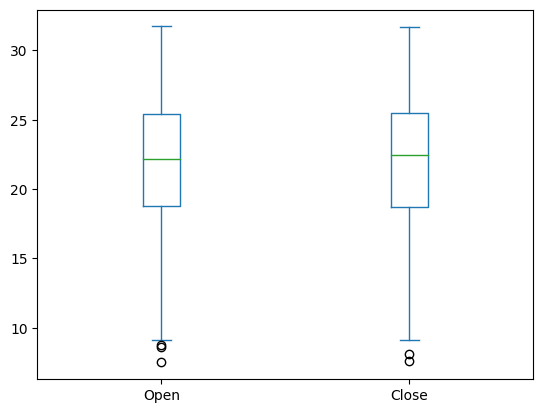

In [6]:
metrics = bpca[['Open',  'Close']].reset_index()
metrics.plot.box()

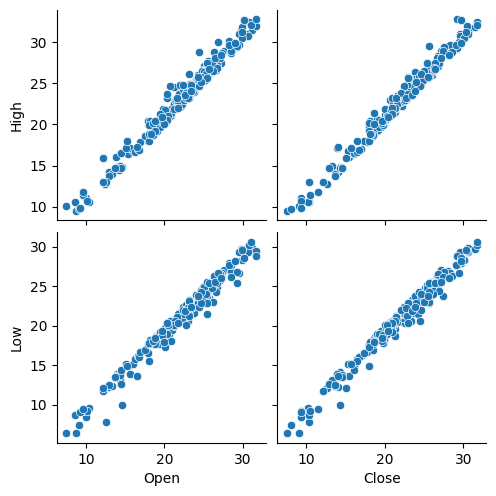

In [7]:
to_observe = bpca[["Open", "High", "Low", "Close"]]
sns.pairplot(
        data=to_observe, 
        x_vars=["Open", "Close"], 
        y_vars=["High", "Low"], 
        diag_kind='hist', 
        diag_kws=dict(fill=False),
                )
plt.show()

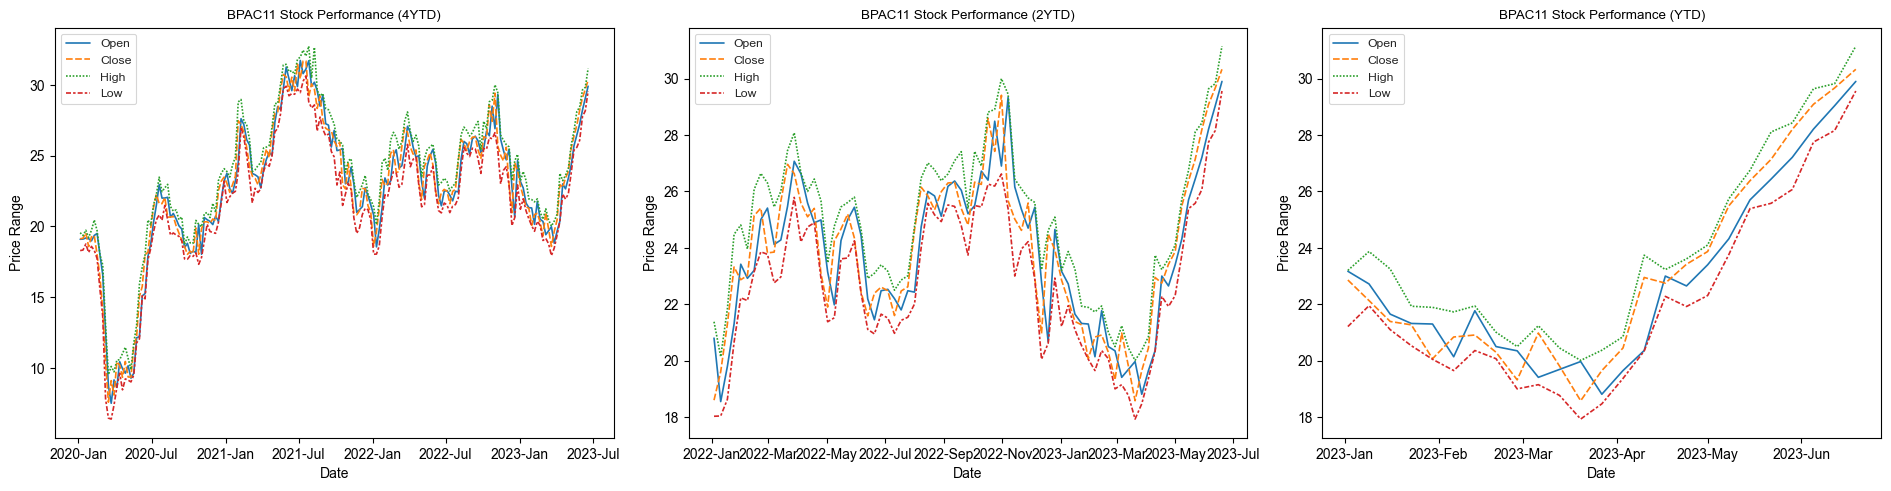

<Figure size 640x480 with 0 Axes>

In [8]:
fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, figsize=(19,5))

sns.set_style('whitegrid')
sns.set_context('paper')

# AXIS 0
range_1 = bpca.query("Date >= '2020-01-01'")
range_1_data = range_1[["Open", "Close", "High", "Low"]]

sns.lineplot(range_1_data, ax=ax0)

ax0.set(ylabel="Price Range",
        title=f"BPAC11 Stock Performance (4YTD)")

ax0.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))

# AXIS 1
range_2 = bpca.query("Date >= '2022-01-01'")
range_2_data = range_2[["Open", "Close", "High", "Low"]]

sns.lineplot(range_2_data, ax=ax1)

ax1.set(ylabel="Price Range",
        title="BPAC11 Stock Performance (2YTD)")

ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))

# AXIS 2
range_3 = bpca.query("Date > '2023-01-01'")
range_3_data = range_3[["Open", "Close", "High", "Low"]]

sns.lineplot(range_3_data, ax=ax2)

ax2.set(ylabel="Price Range",
        title="BPAC11 Stock Performance (YTD)")

ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))

plt.tight_layout()
plt.show()
plt.clf()


# Macroeconomic Analysis

Getting a grasp of macroeconomicla trends

In [9]:
selic = sgs.get({'selic':432}, start='2015-01-01').reset_index()

selic.head()

,Date,selic
0,2015-01-01,11.75
1,2015-01-02,11.75
2,2015-01-03,11.75
3,2015-01-04,11.75
4,2015-01-05,11.75


In [10]:
selic = selic.rename(columns={'Date':'date', 'selic':'interest_rate'})

selic['interest_rate'].describe()

count    3097.000000
mean        9.078947
std         4.299550
min         2.000000
25%         6.000000
50%         8.250000
75%        13.750000
max        14.250000
Name: interest_rate, dtype: float64

<Axes: >

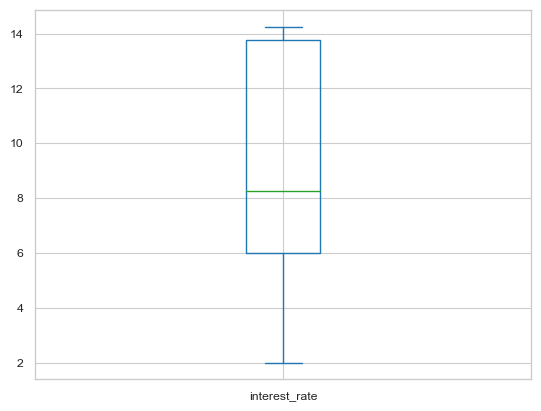

In [11]:
selic.plot.box()

In [12]:
inflation = sgs.get({'ipca':433, 'igpm':189}, start='2015-01-01').reset_index()

inflation.head()

,Date,ipca,igpm
0,2015-01-01,1.24,0.76
1,2015-02-01,1.22,0.27
2,2015-03-01,1.32,0.98
3,2015-04-01,0.71,1.17
4,2015-05-01,0.74,0.41


In [13]:
inflation['Date'] = pd.to_datetime(inflation['Date'])
inflation.describe()

,ipca,igpm
count,101.000000,101.000000
mean,0.492970,0.707822
std,0.429529,1.076325
min,-0.680000,-1.840000
25%,0.230000,0.150000
50%,0.440000,0.590000
75%,0.790000,1.170000
max,1.620000,4.340000


<Axes: >

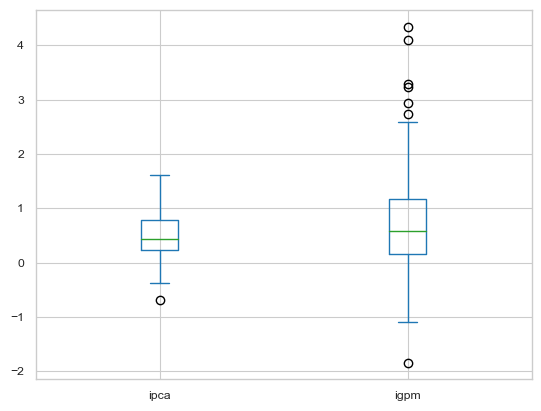

In [14]:
inflation.plot.box()

In [15]:
corr = round(inflation['ipca'].corr(inflation['igpm']), 2)
print(f"IGPM and IPCA have a correlation of {corr}")

IGPM and IPCA have a correlation of 0.38


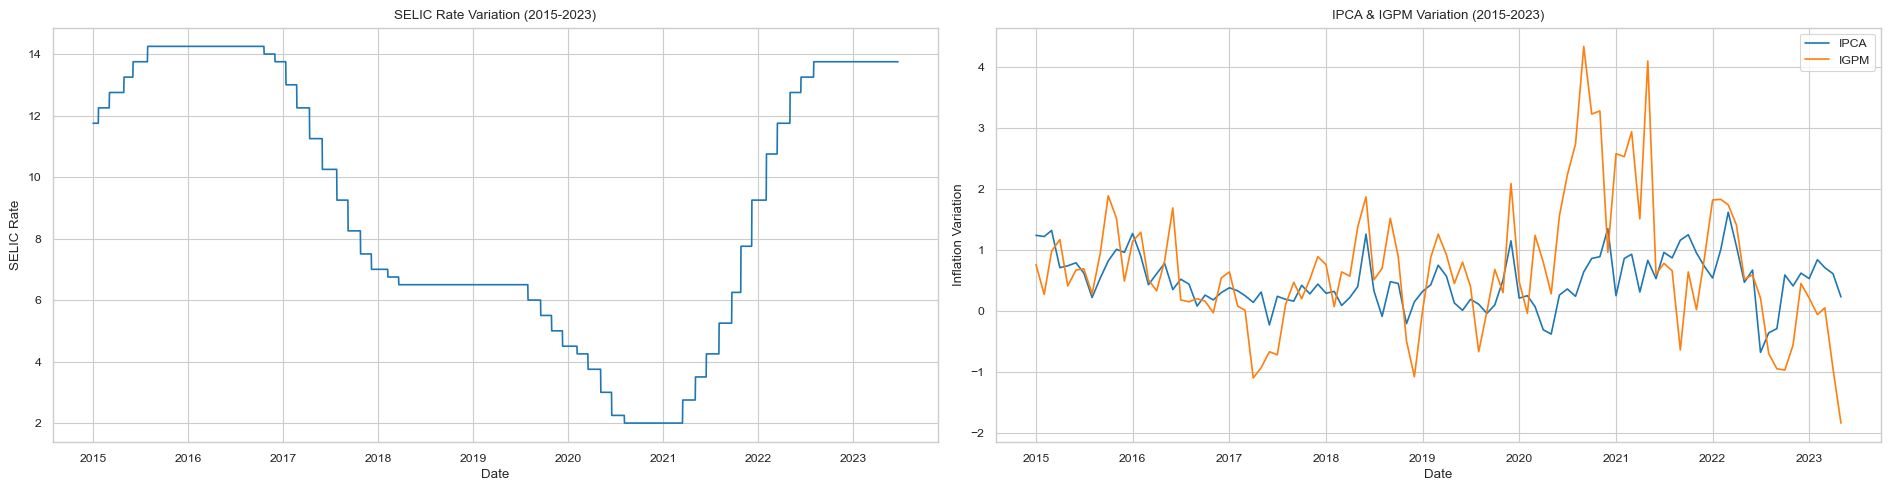

In [16]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(19,5))
sns.set_style('whitegrid')

sns.lineplot(data=selic, x='date', y='interest_rate', ax=ax0)

ax0.set(title="SELIC Rate Variation (2015-2023)",
        ylabel='SELIC Rate',
        xlabel='Date')

inflation_data = inflation.query("Date > '2015-01-01'")

plt.plot(inflation['Date'], inflation[['ipca', 'igpm']])
plt.legend(['IPCA', 'IGPM'])

ax1.set(title="IPCA & IGPM Variation (2015-2023)",
        ylabel='Inflation Variation',
        xlabel='Date')

ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.tight_layout()
plt.show()

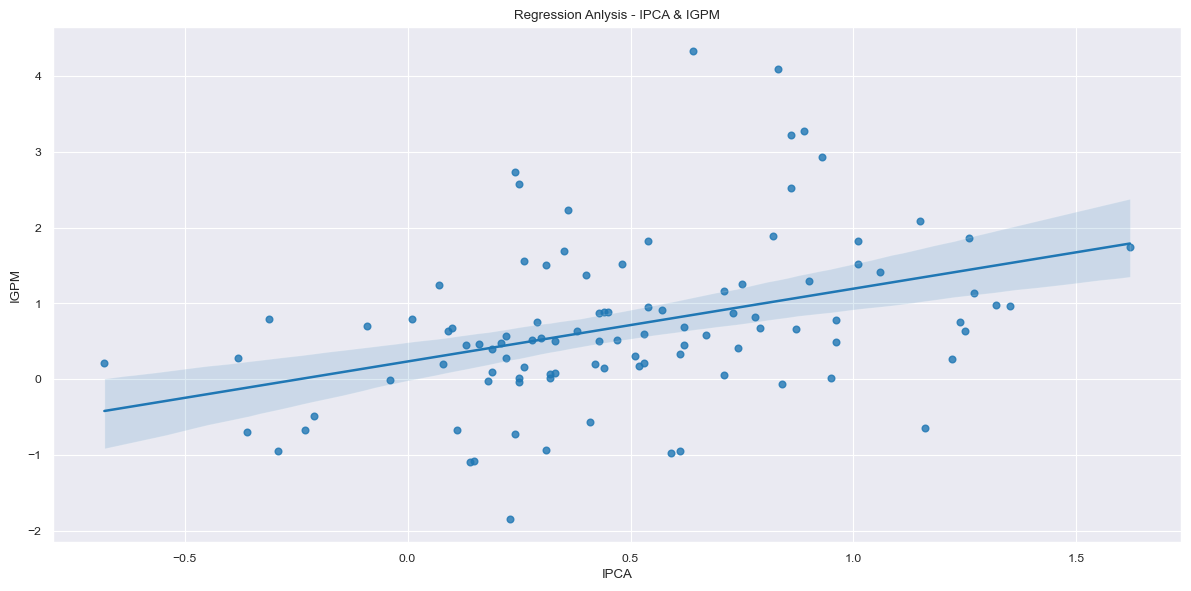

In [17]:
sns.set_style('darkgrid')

fig, ax = plt.subplots(figsize=(12,6))
sns.regplot(data=inflation, x='ipca', y='igpm', ax=ax)

ax.set(title="Regression Anlysis - IPCA & IGPM",
        ylabel='IGPM',
        xlabel='IPCA')

plt.tight_layout()
plt.show()

## BTG & Macro environment

Assessing how sensible are BTG stocks to the macro environment

In [18]:
#Combining the data
btg_pac = bpca.reset_index().rename(columns=str.lower)

btg_selic = pd.merge(left=btg_pac, right=selic, on='date', how='inner')

btg_sel = btg_selic[['date', 'open', 'high', 'low', 'close', 'volume', 'interest_rate']]
btg_sel.head()

,date,open,high,low,close,volume,interest_rate
0,2019-06-24,12.4925,12.7200,12.0550,12.7200,66100400,6.5
1,2019-07-01,12.9500,14.2200,12.2775,14.0275,34978000,6.5
2,2019-07-08,13.9650,14.7925,13.9025,14.4975,41909600,6.5
3,2019-07-15,14.5000,14.7500,14.1400,14.3050,36776800,6.5
4,2019-07-22,14.2225,14.4700,13.5575,13.7800,27584800,6.5


In [19]:
corr_btg_sel = btg_sel.corr(numeric_only=True)
corr_btg_sel

,open,high,low,close,volume,interest_rate
open,1.000000,0.988113,0.986733,0.975523,-0.076002,0.278046
high,0.988113,1.000000,0.987315,0.990129,-0.036527,0.282698
low,0.986733,0.987315,1.000000,0.988937,-0.139136,0.272315
close,0.975523,0.990129,0.988937,1.000000,-0.080481,0.281185
volume,-0.076002,-0.036527,-0.139136,-0.080481,1.000000,-0.102447
interest_rate,0.278046,0.282698,0.272315,0.281185,-0.102447,1.000000


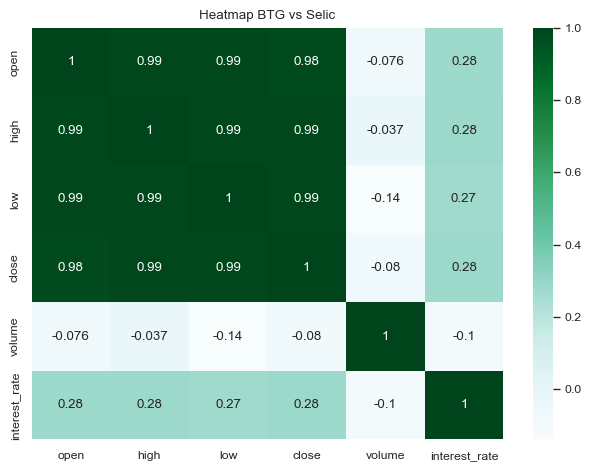

In [20]:
ax = sns.heatmap(data=corr_btg_sel, annot=True, cbar=True, cmap='BuGn')

ax.set(title='Heatmap BTG vs Selic')

plt.tight_layout()
plt.show()

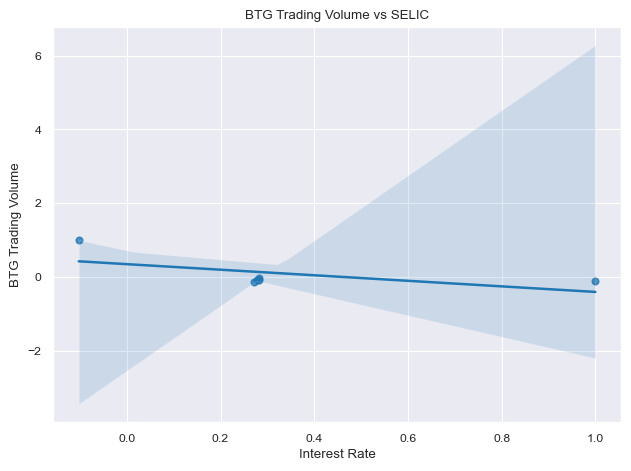

In [21]:
fig, ax = plt.subplots()

sns.regplot(data=corr_btg_sel, x='interest_rate', y='volume', ax=ax)

ax.set(title='BTG Trading Volume vs SELIC',
        xlabel='Interest Rate',
        ylabel='BTG Trading Volume')

plt.tight_layout()
plt.show()

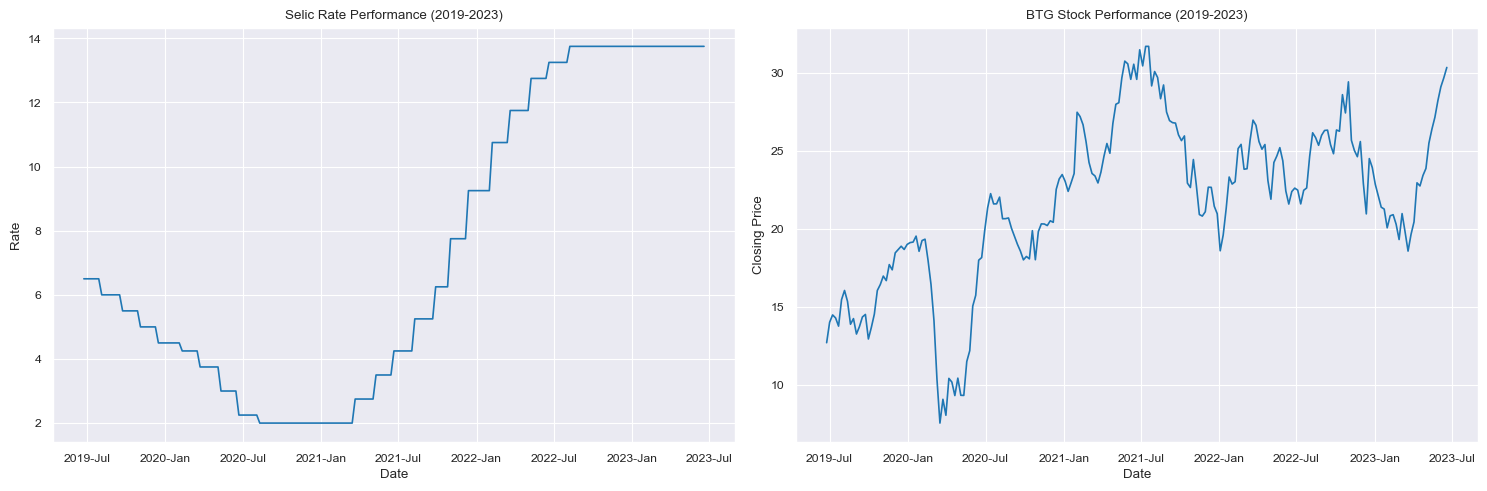

In [22]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(15, 5))

#AX0

sns.lineplot(data=btg_sel, x='date', y='interest_rate', ax=ax0)

ax0.set(title='Selic Rate Performance (2019-2023)',
        xlabel='Date',
        ylabel='Rate')


#AX1 
btg_sel_btg_only = btg_sel.drop(columns='interest_rate')

sns.lineplot(data=btg_sel_btg_only, x='date', y='close', ax=ax1)

ax1.set(title='BTG Stock Performance (2019-2023)',
        xlabel='Date',
        ylabel='Closing Price')


ax0.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))

plt.tight_layout()
plt.show()
